In [43]:
import pandas as pd
import regex as re
import random

In [46]:

train_path = './train.csv'

train_df = pd.read_csv(train_path)

# train_df['sentences'] = train_df['full_text'].apply(lambda x: re.split(r'[.?!]', x))
train_df['sentences'] = train_df['full_text'].apply(lambda x: re.split(r'[.]', x))

sentences = {}
for row in train_df.iterrows():
    score = row[1][4]
    split_text = row[1][8]
    if score not in sentences:
        sentences[score] = []
    for sentence in split_text:
        sentences[score].append(sentence)

num_sentences = {x: len(sentences[x]) for x in sentences.keys()}
print(num_sentences)

{3.0: 26078, 4.5: 2893, 4.0: 13680, 3.5: 21030, 2.5: 7980, 2.0: 1643, 5.0: 1247, 1.5: 135, 1.0: 22}


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

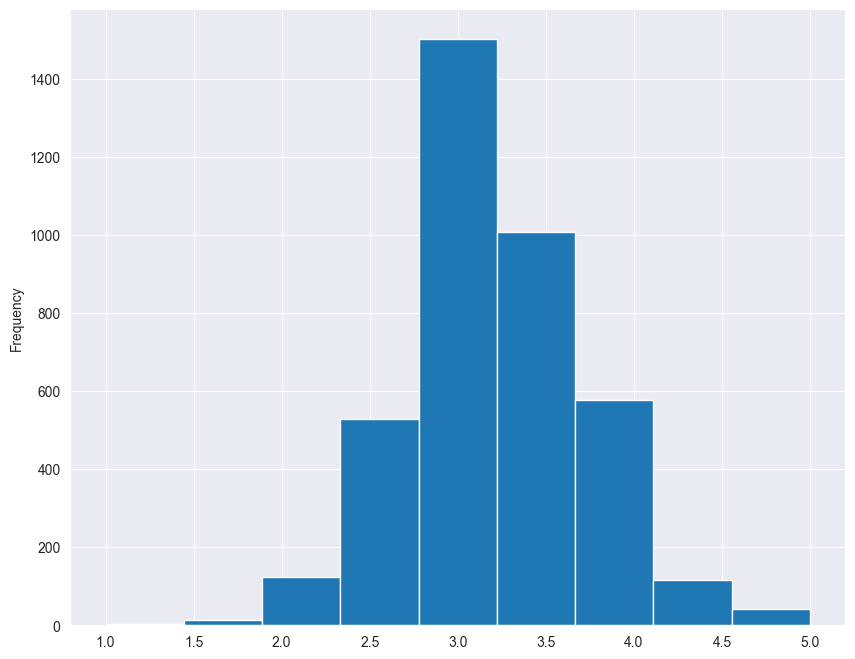

In [53]:
ax = train_df.plot.hist(column=["vocabulary"], bins=9, figsize=(10, 8), legend=None)


In [47]:
added_df = train_df.copy()
scores = [1, 1.5, 2, 4, 4.5, 5]
for x in range(1000):
    for score in scores:
        sentence = random.sample(sentences[score], 12)
        new_row = pd.DataFrame([{"full_text": ".".join(sentence), "vocabulary": score}])
        added_df = pd.concat([added_df, new_row], axis=0, ignore_index=True)

added_df.to_csv('oversampled.csv')
print(added_df)

           text_id                                          full_text  \
0     0016926B079C  I think that students would benefit from learn...   
1     0022683E9EA5  When a problem is a change you have to let it ...   
2     00299B378633  Dear, Principal\n\nIf u change the school poli...   
3     003885A45F42  The best time in life is when you become yours...   
4     0049B1DF5CCC  Small act of kindness can impact in other peop...   
...            ...                                                ...   
9906           NaN  thi don't really select a work in wat iam inte...   
9907           NaN  \n\nSoccer is the sport that I like. You frist...   
9908           NaN   If the goal is success, then missing the chan...   
9909           NaN   You've changed for a reason so now you should...   
9910           NaN   Teenagers are always watching, whether on soc...   

      cohesion  syntax  vocabulary  phraseology  grammar  conventions  \
0          3.5     3.5         3.0          3.0   

In [49]:
added_df.to_csv('oversampled.csv', index=False)


In [41]:
print(train_df.columns)
print(train_df['sentences'].head())
ax = train_df.plot.hist(column=["sentences"], by="vocabulary", figsize=(10, 8))

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions', 'sentences'],
      dtype='object')
0    [I think that students would benefit from lear...
1    [When a problem is a change you have to let it...
2    [Dear, Principal\n\nIf u change the school pol...
3    [The best time in life is when you become your...
4    [Small act of kindness can impact in other peo...
Name: sentences, dtype: object


KeyError: "Columns not found: 'num_sentences'"